<a href="https://colab.research.google.com/github/ANCYMICHAEL/College_Projects/blob/main/Model1_implem_cmp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
# preprocess the input images
# loop the folder where images are stored
#  create dataframe/numpy array to hold 224x224 image
# do  prepocess steps on images before feature extraction
#Creaate the set as Traningset numpy array

#load data
skin_df = pd.read_csv('hmnist_28_28_RGB.csv')
skin_df.head()

In [ ]:
X = skin_df.drop("label", axis=1)
X=X.to_numpy()
label = skin_df["label"].values


In [ ]:
X_mean = np.mean(X)
X_std = np.std(X)

X = (X - X_mean)/X_std

In [ ]:
X_train_orig, X_test, y_train_orig, y_test = train_test_split(X, label, test_size=0.3,random_state=0)
X_train_orig.shape, X_test.shape, y_train_orig.shape, y_test.shape



((7010, 2352), (3005, 2352), (7010,), (3005,))

In [ ]:

X_train, X_val, y_train, y_val = train_test_split(X_train_orig, y_train_orig, test_size=0.2, random_state=1)
X_train.shape, X_val.shape, y_train.shape, y_val.shape



((5608, 2352), (1402, 2352), (5608,), (1402,))

In [ ]:
X_train.shape, X_val.shape, X_test.shape
y_train.shape

(5608,)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 3))
X_val = X_val.reshape(X_val.shape[0], *(28, 28, 3))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 3))



In [ ]:
X_train.shape, X_val.shape, X_test.shape
y_train.shape


(5608,)

In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape, y_val.shape, y_test.shape

((5608, 7), (1402, 7), (3005, 7))

In [ ]:

import tensorflow as tf
from tensorflow import keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
%matplotlib inline

import matplotlib.pyplot as plt

In [ ]:
img_input = layers.Input(shape=(28, 28, 3))
x = layers.Conv2D(14, 3, activation='relu', padding='same')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(28, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(7, activation='softmax')(x)
model = Model(img_input, output)
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 14)        392       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 14)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 28)        3556      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 28)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1372)              0     

In [ ]:
model.save("skinmodel")

INFO:tensorflow:Assets written to: skinmodel\assets


In [ ]:
history = model.fit(X_train, y_train,epochs = 6, validation_data = (X_val, y_val) )

Epoch 1/6
176/176 [==============================] - 7s 34ms/step - loss: 0.9303 - accuracy: 0.6817 - val_loss: 0.8491 - val_accuracy: 0.6976
Epoch 2/6
176/176 [==============================] - 6s 32ms/step - loss: 0.8035 - accuracy: 0.7149 - val_loss: 0.7875 - val_accuracy: 0.7190
Epoch 3/6
176/176 [==============================] - 6s 33ms/step - loss: 0.7319 - accuracy: 0.7366 - val_loss: 0.7327 - val_accuracy: 0.7361
Epoch 4/6
176/176 [==============================] - 6s 33ms/step - loss: 0.7008 - accuracy: 0.7482 - val_loss: 0.7580 - val_accuracy: 0.7197
Epoch 5/6
176/176 [==============================] - 6s 33ms/step - loss: 0.6438 - accuracy: 0.7662 - val_loss: 0.6908 - val_accuracy: 0.7532
Epoch 6/6
176/176 [==============================] - 6s 33ms/step - loss: 0.5967 - accuracy: 0.7780 - val_loss: 0.6759 - val_accuracy: 0.7539


In [ ]:
test=pd.read_csv("E:\\Project_Skin\\data\\small_RGB.csv")

In [ ]:
classes_x=np.argmax(model.predict(X_train), axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix



In [ ]:
loss,accuracy=model.evaluate(X_train,y_train,verbose=1)

176/176 [==============================] - 2s 10ms/step - loss: 0.5107 - accuracy: 0.8215


In [ ]:
print(history)
cc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
print(val_acc)

[0.6975749135017395, 0.71897292137146, 0.7360913157463074, 0.7196861505508423, 0.7532097101211548, 0.7539229393005371]


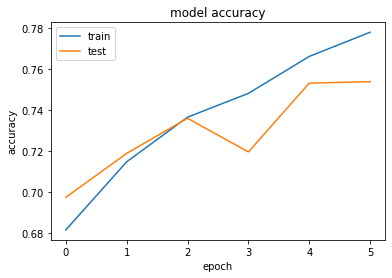

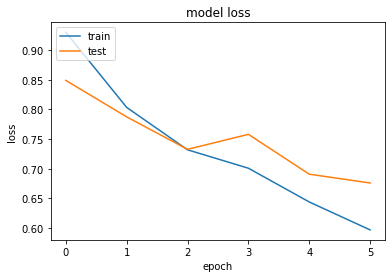

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

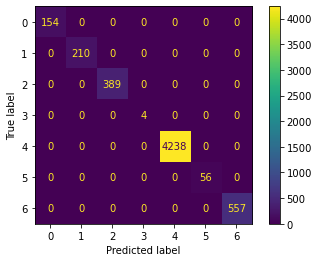

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(classes_x,classes_x)
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])

tp=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tn=cm[1][1]


True positive =  154
False positive =  0
False negative =  0
True negative =  210


In [ ]:
# precision tp / (tp + fp)
precision = tp / (tp + fp)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = tp / (tp + fn)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = tp / ( tp + fp + fn)
print('F1 score: %f' % f1)

Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


In [ ]:
l=0
for xx in classes_x:
    precla=xx
    if precla==0:
        print (' TEST IMAGE   '+ str(l) +' Actinic keratosis   ')
    if precla==1:
        print (' TEST IMAGE  '+ str(l) +' Basal cell carcinoma ')
    if precla==2:
        print (' TEST IMAGE   '+ str(l) +' Benign keratosis   ')
    if precla==3:
        print (' TEST IMAGE  '+ str(l) +' Dermatofibroma  ')
    if precla==4:
        print (' TEST IMAGE  '+ str(l) +' Melanoma ')
    if precla==5:
        print (' TEST IMAGE  '+ str(l) +' Nevus ')   
    if precla==6:
        print (' TEST IMAGE  '+ str(l) +' Vascular skin   ')    
    
    l=l+1

 TEST IMAGE  0 Melanoma 
 TEST IMAGE  1 Melanoma 
 TEST IMAGE  2 Melanoma 
 TEST IMAGE  3 Melanoma 
 TEST IMAGE  4 Vascular skin   
 TEST IMAGE  5 Melanoma 
 TEST IMAGE  6 Melanoma 
 TEST IMAGE  7 Melanoma 
 TEST IMAGE  8 Melanoma 
 TEST IMAGE   9 Actinic keratosis   
 TEST IMAGE  10 Melanoma 
 TEST IMAGE  11 Melanoma 
 TEST IMAGE  12 Vascular skin   
 TEST IMAGE  13 Melanoma 
 TEST IMAGE  14 Melanoma 
 TEST IMAGE  15 Melanoma 
 TEST IMAGE  16 Melanoma 
 TEST IMAGE  17 Melanoma 
 TEST IMAGE  18 Melanoma 
 TEST IMAGE  19 Melanoma 
 TEST IMAGE  20 Melanoma 
 TEST IMAGE  21 Melanoma 
 TEST IMAGE  22 Melanoma 
 TEST IMAGE  23 Melanoma 
 TEST IMAGE  24 Melanoma 
 TEST IMAGE  25 Melanoma 
 TEST IMAGE  26 Vascular skin   
 TEST IMAGE  27 Melanoma 
 TEST IMAGE  28 Melanoma 
 TEST IMAGE  29 Melanoma 
 TEST IMAGE  30 Vascular skin   
 TEST IMAGE  31 Melanoma 
 TEST IMAGE  32 Melanoma 
 TEST IMAGE  33 Melanoma 
 TEST IMAGE  34 Melanoma 
 TEST IMAGE  35 Melanoma 
 TEST IMAGE   36 Benign keratosis 

 TEST IMAGE  1599 Melanoma 
 TEST IMAGE  1600 Melanoma 
 TEST IMAGE   1601 Actinic keratosis   
 TEST IMAGE  1602 Nevus 
 TEST IMAGE  1603 Melanoma 
 TEST IMAGE  1604 Melanoma 
 TEST IMAGE   1605 Benign keratosis   
 TEST IMAGE  1606 Melanoma 
 TEST IMAGE  1607 Vascular skin   
 TEST IMAGE  1608 Melanoma 
 TEST IMAGE  1609 Melanoma 
 TEST IMAGE  1610 Melanoma 
 TEST IMAGE  1611 Melanoma 
 TEST IMAGE  1612 Nevus 
 TEST IMAGE  1613 Melanoma 
 TEST IMAGE  1614 Melanoma 
 TEST IMAGE  1615 Melanoma 
 TEST IMAGE  1616 Melanoma 
 TEST IMAGE  1617 Melanoma 
 TEST IMAGE  1618 Melanoma 
 TEST IMAGE  1619 Melanoma 
 TEST IMAGE  1620 Melanoma 
 TEST IMAGE  1621 Melanoma 
 TEST IMAGE  1622 Melanoma 
 TEST IMAGE  1623 Melanoma 
 TEST IMAGE  1624 Melanoma 
 TEST IMAGE  1625 Melanoma 
 TEST IMAGE  1626 Melanoma 
 TEST IMAGE  1627 Melanoma 
 TEST IMAGE  1628 Melanoma 
 TEST IMAGE  1629 Melanoma 
 TEST IMAGE  1630 Melanoma 
 TEST IMAGE  1631 Melanoma 
 TEST IMAGE  1632 Basal cell carcinoma 
 TEST IMAGE 

 TEST IMAGE   2963 Actinic keratosis   
 TEST IMAGE   2964 Actinic keratosis   
 TEST IMAGE  2965 Vascular skin   
 TEST IMAGE  2966 Melanoma 
 TEST IMAGE  2967 Melanoma 
 TEST IMAGE  2968 Melanoma 
 TEST IMAGE  2969 Melanoma 
 TEST IMAGE  2970 Melanoma 
 TEST IMAGE  2971 Melanoma 
 TEST IMAGE  2972 Melanoma 
 TEST IMAGE  2973 Melanoma 
 TEST IMAGE  2974 Melanoma 
 TEST IMAGE  2975 Melanoma 
 TEST IMAGE  2976 Melanoma 
 TEST IMAGE  2977 Melanoma 
 TEST IMAGE  2978 Vascular skin   
 TEST IMAGE  2979 Melanoma 
 TEST IMAGE  2980 Basal cell carcinoma 
 TEST IMAGE  2981 Melanoma 
 TEST IMAGE  2982 Melanoma 
 TEST IMAGE  2983 Melanoma 
 TEST IMAGE  2984 Melanoma 
 TEST IMAGE  2985 Melanoma 
 TEST IMAGE  2986 Melanoma 
 TEST IMAGE   2987 Actinic keratosis   
 TEST IMAGE  2988 Melanoma 
 TEST IMAGE  2989 Melanoma 
 TEST IMAGE   2990 Benign keratosis   
 TEST IMAGE   2991 Benign keratosis   
 TEST IMAGE  2992 Melanoma 
 TEST IMAGE  2993 Melanoma 
 TEST IMAGE  2994 Melanoma 
 TEST IMAGE  2995 Me

 TEST IMAGE  4098 Melanoma 
 TEST IMAGE  4099 Melanoma 
 TEST IMAGE  4100 Melanoma 
 TEST IMAGE  4101 Melanoma 
 TEST IMAGE  4102 Melanoma 
 TEST IMAGE   4103 Benign keratosis   
 TEST IMAGE  4104 Melanoma 
 TEST IMAGE  4105 Melanoma 
 TEST IMAGE  4106 Melanoma 
 TEST IMAGE  4107 Melanoma 
 TEST IMAGE  4108 Melanoma 
 TEST IMAGE  4109 Nevus 
 TEST IMAGE  4110 Melanoma 
 TEST IMAGE  4111 Melanoma 
 TEST IMAGE  4112 Basal cell carcinoma 
 TEST IMAGE  4113 Melanoma 
 TEST IMAGE  4114 Melanoma 
 TEST IMAGE   4115 Benign keratosis   
 TEST IMAGE  4116 Melanoma 
 TEST IMAGE  4117 Melanoma 
 TEST IMAGE  4118 Melanoma 
 TEST IMAGE  4119 Melanoma 
 TEST IMAGE  4120 Melanoma 
 TEST IMAGE  4121 Melanoma 
 TEST IMAGE  4122 Melanoma 
 TEST IMAGE  4123 Melanoma 
 TEST IMAGE  4124 Melanoma 
 TEST IMAGE  4125 Melanoma 
 TEST IMAGE  4126 Melanoma 
 TEST IMAGE  4127 Melanoma 
 TEST IMAGE  4128 Melanoma 
 TEST IMAGE  4129 Vascular skin   
 TEST IMAGE  4130 Melanoma 
 TEST IMAGE   4131 Benign keratosis   

 TEST IMAGE  5195 Melanoma 
 TEST IMAGE  5196 Vascular skin   
 TEST IMAGE  5197 Melanoma 
 TEST IMAGE  5198 Melanoma 
 TEST IMAGE   5199 Benign keratosis   
 TEST IMAGE  5200 Melanoma 
 TEST IMAGE  5201 Melanoma 
 TEST IMAGE   5202 Benign keratosis   
 TEST IMAGE  5203 Melanoma 
 TEST IMAGE   5204 Actinic keratosis   
 TEST IMAGE  5205 Melanoma 
 TEST IMAGE  5206 Melanoma 
 TEST IMAGE  5207 Melanoma 
 TEST IMAGE   5208 Benign keratosis   
 TEST IMAGE  5209 Melanoma 
 TEST IMAGE  5210 Melanoma 
 TEST IMAGE   5211 Benign keratosis   
 TEST IMAGE   5212 Benign keratosis   
 TEST IMAGE  5213 Melanoma 
 TEST IMAGE  5214 Melanoma 
 TEST IMAGE  5215 Melanoma 
 TEST IMAGE  5216 Vascular skin   
 TEST IMAGE  5217 Vascular skin   
 TEST IMAGE   5218 Actinic keratosis   
 TEST IMAGE  5219 Vascular skin   
 TEST IMAGE  5220 Melanoma 
 TEST IMAGE  5221 Melanoma 
 TEST IMAGE  5222 Vascular skin   
 TEST IMAGE  5223 Melanoma 
 TEST IMAGE  5224 Melanoma 
 TEST IMAGE  5225 Melanoma 
 TEST IMAGE  5226 